No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[[-0.00950585]
 [-0.03778289]
 [ 0.01281648]
 [-0.00950585]
 [-0.00270846]
 [ 0.00831648]]
[[ 10391.85841368]
 [  2303.78882929]
 [  9000.        ]
 [-10391.85841368]
 [ -2303.78882929]
 [ -2088.63351212]]


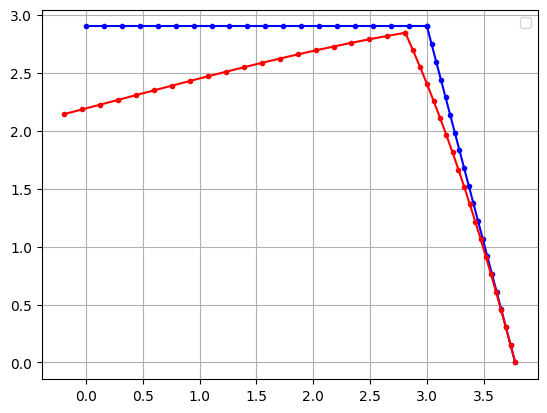

In [1]:
from FEA.FEA import *
import numpy as np
import matplotlib.pyplot as plt


I = 1e-5
A = 1e-3
E = 200e9
L = 3
angle_1 = 0
angle_2 = -75

A_1 = np.array([
    [1, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 1]
])

A_2 = np.array([
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0]
])


element1 = FrameElement(A_1, E, I, L, A, angle_1, UDL=-2000)
element2 = FrameElement(A_2, E, I, L, A, angle_2)

Q = np.array([
    [0],
    [0],
    [0],
    [4914.9],
    [-3441.5],
    [0]
], dtype=np.float64)

structure = Structure([element1, element2], Q)

structure.solve()

print(structure.q)
print(structure.elements[1].local_force)

nodes = np.array([
    [0, 2.8978],
    [3, 2.8978],
    [3.776, 0]
])

structure.plot_structure(nodes, 20, 20)